# 

### Name - Vaibhav R. Gudulkar

## Assignment - Simple Linear Regression (delivery_time.csv)

In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [3]:
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, inplace=True)
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

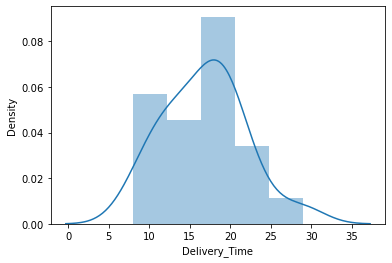

In [7]:
sns.distplot(data['Delivery_Time'])

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

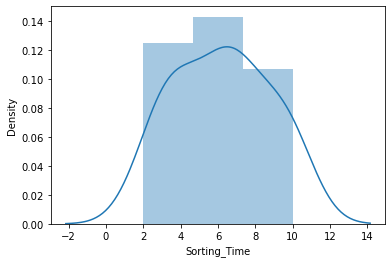

In [8]:
sns.distplot(data['Sorting_Time'])

In [9]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time ~ Sorting_Time",data=data).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

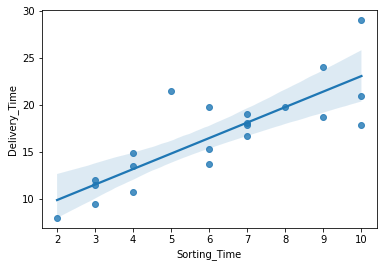

In [10]:
sns.regplot(data=data,x='Sorting_Time',y='Delivery_Time')

In [45]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [46]:
6.582+1.649*20

39.562000000000005

In [47]:
model.tvalues,'\n',model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 '\n',
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [48]:
model.tvalues,'\n',model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 '\n',
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [49]:
#predict delivvery time for 20&30 sorting time
sort_time = pd.Series([20,30])

In [50]:
pred_time=pd.DataFrame(sort_time,columns=['Sorting_Time'])

In [51]:
model.predict(pred_time)

0    39.563132
1    56.053331
dtype: float64

In [52]:
y_predicted = model.predict(data)
y_predicted

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [53]:
y_actual=data['Delivery_Time']
y_actual

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery_Time, dtype: float64

### R-Squared and Adj R-Squared

In [54]:
print('R-Squared=%f Adj-R-Squared=%f' % (model.rsquared,model.rsquared_adj))

R-Squared=0.682271 Adj-R-Squared=0.665549


### RMSE Value

In [55]:
rmse = mean_squared_error(y_actual,y_predicted,squared=False)
rmse

2.7916503270617654

In [56]:
from math import sqrt
rmse1 = sqrt(mean_squared_error(y_actual,y_predicted))
rmse1

2.7916503270617654

### MSE Value Using Log

In [58]:
mse_log = mean_squared_log_error(y_actual,y_predicted)
mse_log

0.021681237210850083